<div class="alert alert-block alert-danger">  
    <h1><center><strong>👨‍💻 Arabic Twitter Sentiment Analysis </strong></center></h1>
    <i></i>
</div>

# <img src="https://res.cloudinary.com/practicaldev/image/fetch/s--4KDpwn0C--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/i/t72k5kh3v868bjdgbnww.png">

<div class="alert alert-block alert-info">  
<h1><strong>Introduction</strong></h1>
    <p>In this kernel, we are going to analyse the Arabic langauge based tweets for the sentiment analysis. There are two types of sentiments which are positive and negative. The data contains the positive tweet text and negative tweet text for the binary classification. There are 18743 records/tweets are labeled as positive and 29051 are negative tweets.</p>
    <br>
        <hr>
      <b>Problem description: </b> 
    <hr>
<ul>
    <li>To build a robust system to classify the sentiments in arabic text based tweets using machine learning.</li>
</ul>


<hr>
<b>Evolution measures: </b> 
<hr>
<ul>
<p> After training the model, we will apply the evaluation measures to check that how the model is getting predictions. We will use the following evaluation measures to evaluate the performance of the model:</p>
    <li>Accuracy</li>
    <li>Precision</li>
     <li>Recall</li>
     <li>F1 Measure</li>
</ul>
<hr>
<b>Technical Approach</b>
<hr>
<p>We are using python language in the implementations and Jupyter Notebook that support the machine learning and data science projects. After training on the model, we will evaluate the model to check the performance of trained model and will select the final model for classification of arabic tweet sentiments</p>
 
<hr>
<b>Source of Data: </b> 
<hr> 
 <a href="hhttps://www.kaggle.com/imranzaman5202/arabic-twitter-sentiment-analysis">https://www.kaggle.com/imranzaman5202/arabic-twitter-sentiment-analysis</a>
   
</div>

# python libraries

In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas
import seaborn as sns 
from sklearn import preprocessing
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
import re
import string
import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

ModuleNotFoundError: No module named 'wordcloud'

# Arabic_tweets_positive dataset 

In [2]:
cols = ['class','tweet_text']
positive = pd.read_csv('../input/arabic-twitter-sentiment-analysis/Arabic_tweets_positive_20190413.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)

FileNotFoundError: [Errno 2] No such file or directory: '../input/arabic-twitter-sentiment-analysis/Arabic_tweets_positive_20190413.tsv'

# showing top 5 records

In [3]:
positive.head()

,class,tweet_text
0,pos,علييك الله قفل ميتينك ❤
1,pos,طيار عراقي يسال برج المراقبة في سلطنة عمان عن ...
2,pos,علمهم تكفى حسبي الله عليهم 🙂
3,pos,🍀 وعن ذكر الله لا تغفلون لا إله إلا الله لا إل...
4,pos,كثير من جمهور #الاهلي يقول لي عطنا تشكيلة #اله...


# Count of positve tweets

In [4]:
print(len(positive))

28536


# Getting tweet text

In [5]:
positive['tweet_text'].head()

0                              علييك الله قفل ميتينك ❤
1    طيار عراقي يسال برج المراقبة في سلطنة عمان عن ...
2                         علمهم تكفى حسبي الله عليهم 🙂
3    🍀 وعن ذكر الله لا تغفلون لا إله إلا الله لا إل...
4    كثير من جمهور #الاهلي يقول لي عطنا تشكيلة #اله...
Name: tweet_text, dtype: object

# Getting target class

In [6]:
positive['class'].head()

0    pos
1    pos
2    pos
3    pos
4    pos
Name: class, dtype: object

# Dataset analysis

# Checking null values

In [7]:
positive[positive.isnull().any(axis=1)].head()

,class,tweet_text


# Checking null values count

In [8]:
np.sum(positive.isnull().any(axis=1))

0

In [9]:
positive.isnull().any(axis=0)

class         False
tweet_text    False
dtype: bool

In [10]:
positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28536 entries, 0 to 28535
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       28536 non-null  object
 1   tweet_text  28536 non-null  object
dtypes: object(2)
memory usage: 446.0+ KB


# cleaning tweet text

In [11]:
for letter in '#.][!XR':
    positive['tweet_text'] = positive['tweet_text'].astype(str).str.replace(letter,'')

In [12]:
positive.head()

,class,tweet_text
0,pos,علييك الله قفل ميتينك ❤
1,pos,طيار عراقي يسال برج المراقبة في سلطنة عمان عن ...
2,pos,علمهم تكفى حسبي الله عليهم 🙂
3,pos,🍀 وعن ذكر الله لا تغفلون لا إله إلا الله لا إل...
4,pos,كثير من جمهور الاهلي يقول لي عطنا تشكيلة الهلا...


# Preprocess data

In [13]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

# normalize_arabic

In [14]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

# remove_repeating_char

In [15]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

# processPost for applying all functions

In [16]:
def processPost(tweet): 

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
     #tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)
    
    return tweet

# applying processPost function for preprocessing

In [17]:
positive["tweet_text"] = positive['tweet_text'].apply(lambda x: processPost(x)) # apply used to call the method processpost

# Getting Tokenize the tweet text

In [18]:
tokenizer = RegexpTokenizer(r'\w+')
positive["tweet_text"] = positive["tweet_text"].apply(tokenizer.tokenize)

In [19]:
positive["tweet_text"].head()

0                             [عليك, اله, قفل, ميتينك]
1    [طيار, عراقي, يسال, برج, المراقبة, في, سلطنة, ...
2                      [علمهم, تكفى, حسبي, اله, عليهم]
3    [وعن, ذكر, اله, لا, تغفلون, لا, إله, إلا, اله,...
4    [كثير, من, جمهور, الاهلي, يقول, لي, عطنا, تشكي...
Name: tweet_text, dtype: object

# Stop words 

In [20]:
stopwords_list = stopwords.words('arabic')

In [21]:
stopwords_list

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [22]:
print(len(stopwords_list))

248


In [23]:
print(type(stopwords_list))

<class 'list'>


In [24]:
listToStr = ' '.join([str(elem) for elem in stopwords_list]) 

In [25]:
listToStr

'إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هن

# Removing stop words

In [26]:
positive["tweet_text"]=positive["tweet_text"].apply(lambda x: [item for item in x if item not in stopwords_list])

# Tweet text information

In [27]:
all_words = [word for tokens in positive["tweet_text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in positive["tweet_text"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

289608 words total, with a vocabulary size of 48338
Max sentence length is 1783


# top 25 words in positive

In [28]:
counter = Counter(all_words)

In [29]:
counter.most_common(25)

[('اله', 5343),
 ('و', 3618),
 ('الهم', 2320),
 ('صباح', 2064),
 ('الهلال', 1517),
 ('pos', 1313),
 ('الخير', 1220),
 ('الي', 1150),
 ('رتويت', 1147),
 ('السحب', 1043),
 ('يارب', 896),
 ('سحب', 816),
 ('الحمد', 814),
 ('يوم', 763),
 ('فوز', 763),
 ('مبروك', 738),
 ('النصر', 714),
 ('انا', 712),
 ('واله', 687),
 ('ساعة', 657),
 ('بمناسبة', 650),
 ('ان', 633),
 ('كان', 590),
 ('اليوم', 582),
 ('قال', 567)]

In [30]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

<BarContainer object of 25 artists>

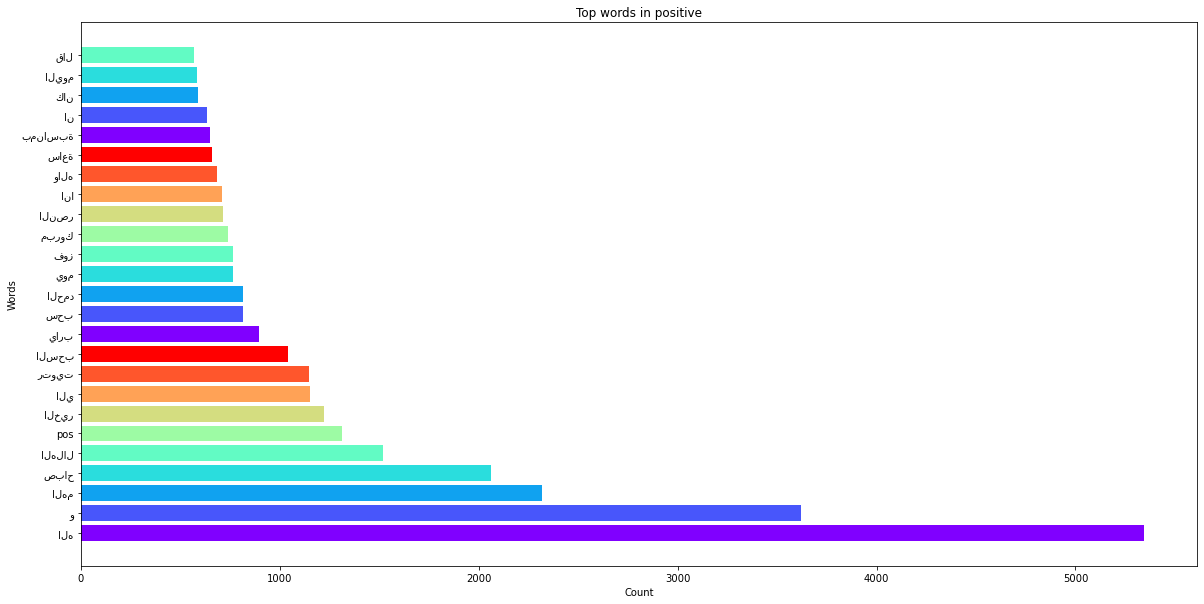

In [31]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in positive')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

# Arabic_tweets_negative dataset 

In [32]:
cols = ['class','tweet_text']
negative = pd.read_csv('../input/arabic-twitter-sentiment-analysis/Arabic_tweets_negative_20190413.tsv',sep='\t', error_bad_lines = False ,header=None, names=cols)

# showing top 5 records

In [33]:
negative.head()

,class,tweet_text
0,neg,رحمه الله رحمه واسعه واسكنه فسيح جناته 😢
1,neg,راح فين كلامك الي كنتي بتقوليه 💔 رايكو في صوتي
2,neg,كلام اهلها انهم دخلوها مستشفى الامل لمدة شهر ع...
3,neg,ليش عم تسبنا يامخرف 😡
4,neg,#السعاده_دايما_هي اشتقت ل حديثك ، و كأني لم اح...


# Count of negative tweets

In [34]:
print(len(negative))

28326


# Getting tweet text

In [35]:
negative['tweet_text'].head()

0             رحمه الله رحمه واسعه واسكنه فسيح جناته 😢
1       راح فين كلامك الي كنتي بتقوليه 💔 رايكو في صوتي
2    كلام اهلها انهم دخلوها مستشفى الامل لمدة شهر ع...
3                                ليش عم تسبنا يامخرف 😡
4    #السعاده_دايما_هي اشتقت ل حديثك ، و كأني لم اح...
Name: tweet_text, dtype: object

# Getting target class

In [36]:
negative['class'].head()

0    neg
1    neg
2    neg
3    neg
4    neg
Name: class, dtype: object

# Dataset analysis

# Checking null values

In [37]:
negative[negative.isnull().any(axis=1)].head()

,class,tweet_text


# Checking null values count

In [38]:
np.sum(negative.isnull().any(axis=1))

0

In [39]:
negative.isnull().any(axis=0)

class         False
tweet_text    False
dtype: bool

In [40]:
negative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28326 entries, 0 to 28325
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       28326 non-null  object
 1   tweet_text  28326 non-null  object
dtypes: object(2)
memory usage: 442.7+ KB


# cleaning tweet text

In [41]:
for letter in '#.][!XR':
    negative['tweet_text'] = negative['tweet_text'].astype(str).str.replace(letter,'')

In [42]:
negative.head()

,class,tweet_text
0,neg,رحمه الله رحمه واسعه واسكنه فسيح جناته 😢
1,neg,راح فين كلامك الي كنتي بتقوليه 💔 رايكو في صوتي
2,neg,كلام اهلها انهم دخلوها مستشفى الامل لمدة شهر ع...
3,neg,ليش عم تسبنا يامخرف 😡
4,neg,السعاده_دايما_هي اشتقت ل حديثك ، و كأني لم احا...


# applying processPost function for preprocessing

In [43]:
negative["tweet_text"] = negative['tweet_text'].apply(lambda x: processPost(x)) # apply used to call the method processpost

# Getting Tokenize the tweet text

In [44]:
tokenizer = RegexpTokenizer(r'\w+')
negative["tweet_text"] = negative["tweet_text"].apply(tokenizer.tokenize)

In [45]:
negative["tweet_text"].head()

0        [رحمه, اله, رحمه, واسعه, واسكنه, فسيح, جناته]
1    [راح, فين, كلامك, الي, كنتي, بتقوليه, رايكو, ف...
2    [كلام, اهلها, انهم, دخلوها, مستشفى, الامل, لمد...
3                             [ليش, عم, تسبنا, يامخرف]
4    [السعادهدايماهي, اشتقت, ل, حديثك, و, كأني, لم,...
Name: tweet_text, dtype: object

# Removing stop words

In [46]:
negative["tweet_text"]=negative["tweet_text"].apply(lambda x: [item for item in x if item not in stopwords_list])

# Tweet text information

In [47]:
all_words = [word for tokens in negative["tweet_text"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in negative["tweet_text"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

265609 words total, with a vocabulary size of 46763
Max sentence length is 925


# top 25 words in negative

In [48]:
counter = Counter(all_words)

In [49]:
counter.most_common(25)

[('و', 3365),
 ('اله', 3095),
 ('الي', 1586),
 ('واله', 1373),
 ('انا', 1315),
 ('ان', 1090),
 ('الهم', 778),
 ('الناس', 721),
 ('مو', 677),
 ('قبل', 637),
 ('كان', 630),
 ('مش', 618),
 ('صباح', 615),
 ('يوم', 608),
 ('ع', 602),
 ('شي', 601),
 ('يارب', 582),
 ('neg', 576),
 ('مافي', 573),
 ('عشان', 569),
 ('يعني', 567),
 ('ف', 515),
 ('دي', 503),
 ('اليوم', 473),
 ('واحد', 460)]

In [50]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

<BarContainer object of 25 artists>

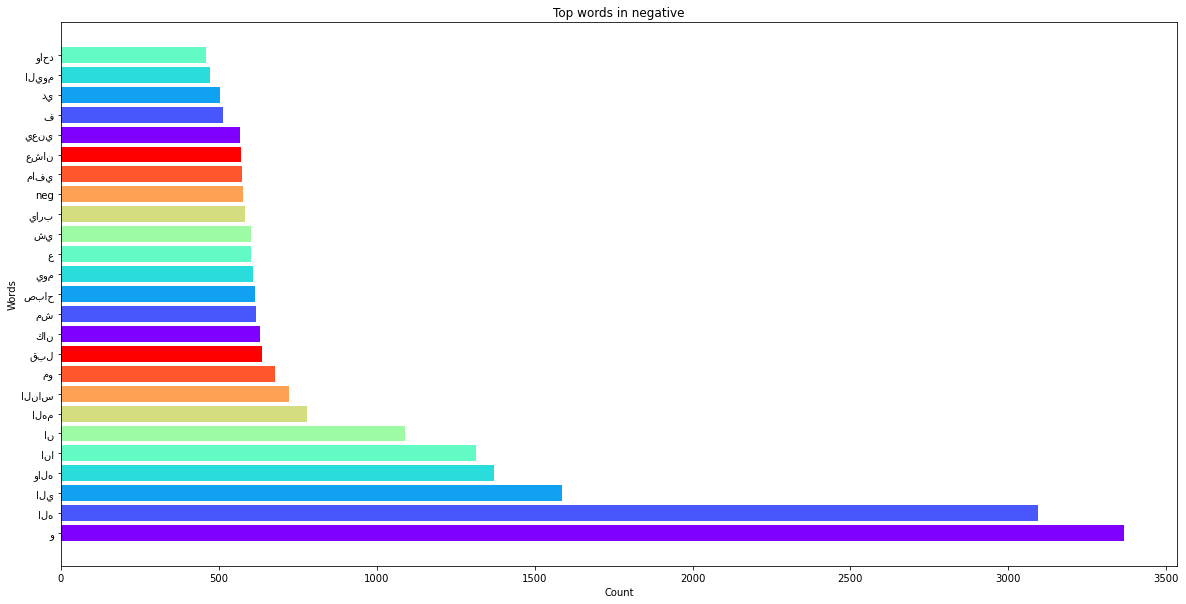

In [51]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in negative')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

# Combining the positive and negative classes and tweets text

In [52]:
final_data = pd.concat([positive, negative], axis=0)

In [53]:
final_data.head()

,class,tweet_text
0,pos,"[اله, قفل, ميتينك]"
1,pos,"[طيار, عراقي, يسال, برج, المراقبة, سلطنة, عمان..."
2,pos,"[علمهم, تكفى, حسبي, اله, عليهم]"
3,pos,"[وعن, ذكر, اله, تغفلون, إله, اله, إله, اله, إل..."
4,pos,"[كثير, جمهور, الاهلي, يقول, عطنا, تشكيلة, الهل..."


# total count of final data

In [54]:
print(len(final_data))

56862


# Count of each target class

In [55]:
y=final_data['class']
y.value_counts()

pos    28536
neg    28326
Name: class, dtype: int64

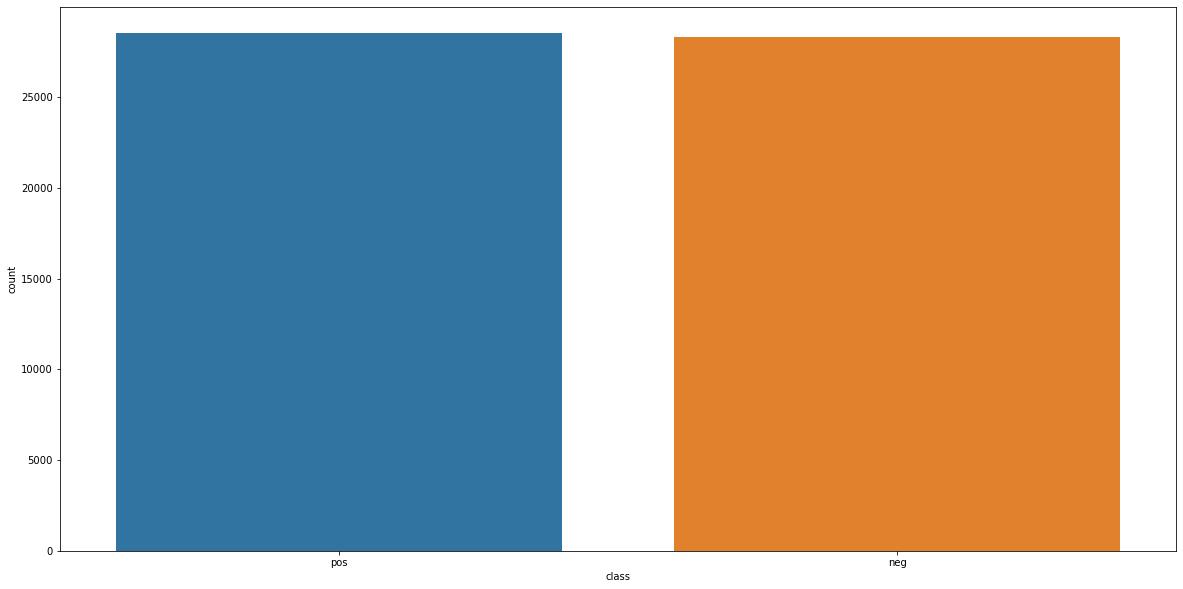

In [56]:
sns.countplot(data= final_data, x = "class")
plt.show()

# Features Extraction from tweets text with TFIDF unigram

In [82]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)

unigramdataGet= word_vectorizer.fit_transform(final_data['tweet_text'].astype('str'))
unigramdataGet = unigramdataGet.toarray()

vocab = word_vectorizer.get_feature_names()
unigramdata_features=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata_features[unigramdata_features>0] = 1

unigramdata_features.head()

,10,16,1953,30,30م,40,412,413,419,50,...,گل,گلنا,گم,گن,ۆفيما,ۈل,یبقی,یوم,ฬw,ᓄᓚᓅɺ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# encoding class as 1 for Postive class and 0 for negative class

In [58]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(final_data['class'])
final_data['class'] = encpro

# By getting features and Class

In [83]:
y=final_data['class']
X=unigramdata_features

# Spliting Dataset into 70% Training and 30% Testing

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

# --------Trainig and Testing with Machine Learning Algorithms ----------------

# Naive Bayes Algorithm

In [61]:
nb=GaussianNB()
nb= nb.fit(X_train , y_train)
nb

GaussianNB()

#### Accuracy

In [62]:
y_pred = nb.predict(X_test)
nb_1=nb.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(nb.score(X_test, y_test)))

Accuracy= 0.688


#### Precision

In [63]:
print('Precision',round(f1_score(y_test, y_pred),2),'%')

Precision 0.66 %


#### Recall

In [64]:
print('Recall',round(recall_score(y_test, y_pred),2),'%')

Recall 0.6 %


#### F1

In [65]:
rf_f1=round(f1_score(y_test, y_pred),2)
print('F1',round(f1_score(y_test, y_pred),2),'%')

F1 0.66 %


# RidgeClassifier Algorithm

In [66]:
RC= RidgeClassifier()
RC= RC.fit(X_train , y_train)
RC

RidgeClassifier()

#### Accuracy

In [67]:
y_pred = RC.predict(X_test)
rc_1=RC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(RC.score(X_test, y_test)))

Accuracy= 0.714


#### Precision

In [68]:
print('Precision',round(f1_score(y_test, y_pred),2),'%')

Precision 0.7 %


#### Recall

In [69]:
print('Recall',round(recall_score(y_test, y_pred),2),'%')

Recall 0.66 %


#### F1

In [70]:
rf_f1=round(f1_score(y_test, y_pred),2)
print('F1',round(f1_score(y_test, y_pred),2),'%')

F1 0.7 %


# PassiveAggressiveClassifier Algorithm

In [71]:
PC= PassiveAggressiveClassifier()
PC= PC.fit(X_train , y_train)
PC

PassiveAggressiveClassifier()

#### Accuracy

In [72]:
y_pred = PC.predict(X_test)
pc_1=PC.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(PC.score(X_test, y_test)))

Accuracy= 0.654


#### Precision

In [73]:
print('Precision',round(f1_score(y_test, y_pred),2),'%')

Precision 0.58 %


#### Recall

In [74]:
print('Recall',round(recall_score(y_test, y_pred),2),'%')

Recall 0.47 %


#### F1

In [75]:
rf_f1=round(f1_score(y_test, y_pred),2)
print('F1',round(f1_score(y_test, y_pred),2),'%')

F1 0.58 %


# LogisticRegression Algorithm

In [85]:
LR= LogisticRegression(penalty = 'l2', C = 1)
LR= LR.fit(X_train , y_train)
LR

LogisticRegression(C=1)

#### Accuracy

In [86]:
y_pred = LR.predict(X_test)
lr_1=LR.score(X_test, y_test)
print('Accuracy= {:.3f}'.format(LR.score(X_test, y_test)))

Accuracy= 0.766


#### Precision

In [87]:
print('Precision',round(f1_score(y_test, y_pred),2),'%')

Precision 0.76 %


#### Recall

In [88]:
print('Recall',round(recall_score(y_test, y_pred),2),'%')

Recall 0.73 %


#### F1

In [89]:
rf_f1=round(f1_score(y_test, y_pred),2)
print('F1',round(f1_score(y_test, y_pred),2),'%')

F1 0.76 %


# Comparison of all algorithms Results

In [90]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithms on F1 score")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Naive Bayes Algorithm", round(nb_1,2)])
x.add_row(["Ridge Classifier Algorithm",  round(rc_1,2)])
x.add_row(["Passive Aggressive Classifier Algorithm", round(pc_1,2)])
x.add_row(["Logistic Regression Algorithm", round(lr_1,2)])

print(x)
print('\n')



Comparison of all algorithms on F1 score
+-----------------------------------------+----------+
|                  Model                  | Accuracy |
+-----------------------------------------+----------+
|          Naive Bayes Algorithm          |   0.69   |
|        Ridge Classifier Algorithm       |   0.71   |
| Passive Aggressive Classifier Algorithm |   0.65   |
|      Logistic Regression Algorithm      |   0.77   |
+-----------------------------------------+----------+




# Training Logistic Regression algorithm on all data because now we know that is giving better results so we can use the final model application as well

In [91]:
RC =LogisticRegression(penalty = 'l2', C = 1)
RC.fit(X,y)

LogisticRegression(C=1)

# Prediction on sample text

In [92]:
tv=['#الهلال_والاهلي اسيست خرافي من كنو 👍🏻 وبوتيا قرأها صح 👍🏻 وبإذن الله الثاني قادم 💙']

In [93]:
x = word_vectorizer.transform(tv)

In [94]:
pred=RC.predict(x)
pred=pro.inverse_transform(pred)
prediction=pd.DataFrame(pred, columns=['Prediction']) 
print (prediction)

  Prediction
0        pos


# Showing prediction with tweet text

In [95]:
result=pd.DataFrame()
result['Text']=tv
result['Prediction']=prediction
result

,Text,Prediction
0,#الهلال_والاهلي اسيست خرافي من كنو 👍🏻 وبوتيا ق...,pos


<div class="alert alert-block alert-success">  
<h1><center><strong>Conclusion 📝</strong></center></h1>
    <p>
<li>We used this dataset  <a href="hhttps://www.kaggle.com/imranzaman5202/arabic-twitter-sentiment-analysis">https://www.kaggle.com/imranzaman5202/arabic-twitter-sentiment-analysis</a> and explored the data with different ways.</li>
        <li>We prepared the data and extract the features.</li>
          <li>We trained model based on different machine learning models </li>
        <li>We evaluated the model with accuracy, precision, recall and F1 measure</li>
        <li>We selected the best model and perform classification on arabic tweet sentiments</li>
        </p>
</div>

<div class="alert alert-block alert-info">  
    <h1><strong>If you like my work, please upvote ^ 👍 my kernel and dataset as well so that i will be motivated to share more content to Kaggle community. Thanks 😍</strong></h1>
    <i></i>
</div>